<a href="https://colab.research.google.com/github/sudhakarmlal/ISLProject/blob/master/Convolutional_Neural_Network_Sign_Language_Digits_ASL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Networks (CNNs / ConvNets)

* # Sudhakar Reddy

Content:
* [Introduction](#1):
* [Loading the Data Set](#2):
* [Train-Test Split Data](#3):
* [Convolutional Neural Network(Implementing with Keras)](#4):
* [Create Model](#5):
* [Define Optimizer](#6):
* [Compile Model](#7):
* [Fit the Model](#8):
* [Evaluate the model](#9):
* [Conclusion](#10):

<a id="1"></a> <br>
# INTRODUCTION
* In this kernel, we will be working on Sign Language Digits Dataset (Implementing with Keras).

In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['Y.npy', 'Sign-language-digits-dataset', 'X.npy']


<a id="2"></a> <br>
## Loading the Data Set
* In this part we load and visualize the data.

In [0]:
# load data set
x = np.load('../input/Sign-language-digits-dataset/X.npy')
y = np.load('../input/Sign-language-digits-dataset/Y.npy')

(-0.5, 63.5, 63.5, -0.5)

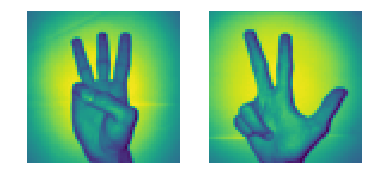

In [0]:
img_size = 64
plt.subplot(1,2,1)
plt.imshow(x[700].reshape(img_size,img_size))
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(x[1500].reshape(img_size,img_size))
plt.axis('off')

In [0]:
# As you can see, y (labels) are already one hot encoded
print(y.max())
print(y.min())
print(y.shape)

# And x (features) are already scaled between 0 and 1
print(x.max())
print(x.min())
print(x.shape)

1.0
0.0
(2062, 10)
1.0
0.003921569
(2062, 64, 64)


<a id="3"></a> <br>
## Train-Test Split Data

In [0]:
# Now,lets create x_train, y_train, x_test, y_test arrays
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
#reshape
x_train = x_train.reshape(-1,64,64,1)
x_test = x_test.reshape(-1,64,64,1)
#print x_train and y_train shape
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1649, 64, 64, 1)
(1649, 10)
(413, 64, 64, 1)
(413, 10)


<a id="4"></a> <br>
## Implementing with Keras

<a id="5"></a> <br>
### Create Model


In [0]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential # to create a cnn model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()

model.add(Conv2D(filters = 8, kernel_size = (5,5), padding = 'Same', activation = 'relu', input_shape = (64,64,1)))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 16, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))


# fully connected
model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

Using TensorFlow backend.


In [0]:
model.summary()

<a id="6"></a>
### Define Optimizer   
* Adam optimizer: Change the learning rate

In [0]:
# Define the optimizer
optimizer = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999)

<a id="7"></a>
### Compile Model
* categorical crossentropy
* We make binary cross entropy at previous parts and in machine learning tutorial
* At this time we use categorical crossentropy. That means that we have multi class.
* <a href="https://ibb.co/jm1bpp"><img src="https://preview.ibb.co/nN3ZaU/cce.jpg" alt="cce" border="0"></a>

In [0]:
# Compile the model
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

<a id="8"></a>
### Fit the Model

In [0]:
history = model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))

Train on 1649 samples, validate on 413 samples
Epoch 1/100
1649/1649 [==============================] - 5s 3ms/step - loss: 2.3084 - acc: 0.0861 - val_loss: 2.3032 - val_acc: 0.0847
Epoch 2/100
1649/1649 [==============================] - 4s 3ms/step - loss: 2.3029 - acc: 0.1055 - val_loss: 2.3038 - val_acc: 0.0847
Epoch 3/100
1649/1649 [==============================] - 4s 3ms/step - loss: 2.3030 - acc: 0.0988 - val_loss: 2.3043 - val_acc: 0.0847
Epoch 4/100
1649/1649 [==============================] - 4s 3ms/step - loss: 2.3011 - acc: 0.1092 - val_loss: 2.3009 - val_acc: 0.0775
Epoch 5/100
1649/1649 [==============================] - 4s 3ms/step - loss: 2.0036 - acc: 0.2547 - val_loss: 1.2778 - val_acc: 0.4697
Epoch 6/100
1649/1649 [==============================] - 4s 3ms/step - loss: 1.0439 - acc: 0.6313 - val_loss: 0.5501 - val_acc: 0.8281
Epoch 7/100
1649/1649 [==============================] - 4s 3ms/step - loss: 0.6580 - acc: 0.7762 - val_loss: 0.4328 - val_acc: 0.8741
Epoch 8/

Epoch 61/100
1649/1649 [==============================] - 4s 3ms/step - loss: 0.0559 - acc: 0.9830 - val_loss: 0.0623 - val_acc: 0.9831
Epoch 62/100
1649/1649 [==============================] - 4s 3ms/step - loss: 0.0583 - acc: 0.9812 - val_loss: 0.0505 - val_acc: 0.9879
Epoch 63/100
1649/1649 [==============================] - 5s 3ms/step - loss: 0.0396 - acc: 0.9861 - val_loss: 0.0303 - val_acc: 0.9903
Epoch 64/100
1649/1649 [==============================] - 5s 3ms/step - loss: 0.0277 - acc: 0.9909 - val_loss: 0.0202 - val_acc: 0.9903
Epoch 65/100
1649/1649 [==============================] - 4s 3ms/step - loss: 0.0252 - acc: 0.9903 - val_loss: 0.0242 - val_acc: 0.9879
Epoch 66/100
1649/1649 [==============================] - 4s 3ms/step - loss: 0.0216 - acc: 0.9933 - val_loss: 0.0382 - val_acc: 0.9927
Epoch 67/100
1649/1649 [==============================] - 4s 3ms/step - loss: 0.0201 - acc: 0.9945 - val_loss: 0.0263 - val_acc: 0.9927
Epoch 68/100
1649/1649 [========================

<a id="9"></a>
## Evaluate the model
* Validation and Loss visualization
* Confusion matrix

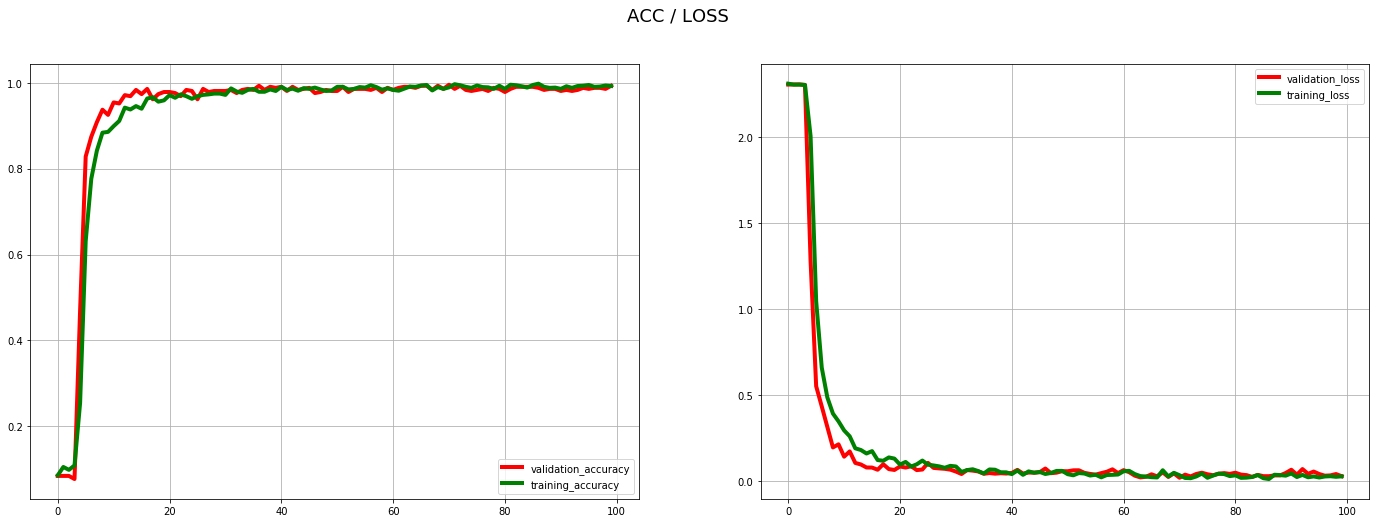

In [0]:
plt.figure(figsize=(24,8))

plt.subplot(1,2,1)
plt.plot(history.history["val_acc"], label="validation_accuracy", c="red", linewidth=4)
plt.plot(history.history["acc"], label="training_accuracy", c="green", linewidth=4)
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history.history["val_loss"], label="validation_loss", c="red", linewidth=4)
plt.plot(history.history["loss"], label="training_loss", c="green", linewidth=4)
plt.legend()
plt.grid(True)

plt.suptitle("ACC / LOSS",fontsize=18)

plt.show()


In [0]:
print('Train accuracy of the model: ',history.history['acc'][-1])

Train accuracy of the model:  0.992116434202547


In [0]:
print('Train loss of the model: ',history.history['loss'][-1])

Train loss of the model:  0.026430067480041935


In [0]:
print('Validation accuracy of the model: ',history.history['val_acc'][-1])

Validation accuracy of the model:  0.9927360774818402


In [0]:
print('Validation loss of the model: ',history.history['val_loss'][-1])

Validation loss of the model:  0.027183887092385343


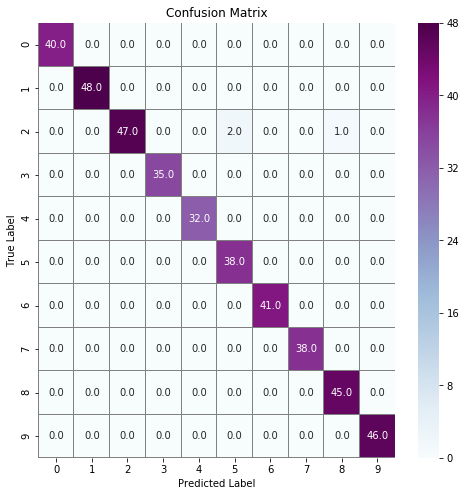

In [0]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

<a id="10"></a>
# Conclusion
* If you like it, please upvote.
* If you have any question, I will be appreciate to hear it.